In [3]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
env = gym.make("Taxi-v3", render_mode='ansi')
env.reset()
print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [5]:
print('State Space: ', env.observation_space)
print('Action Space: ', env.action_space)

State Space:  Discrete(500)
Action Space:  Discrete(6)


In [6]:
state = env.encode(2,2,2,1)
print('Selected State: ', state)

Selected State:  249


In [7]:
env.P[249]

{0: [(1.0, 349, -1, False)],
 1: [(1.0, 149, -1, False)],
 2: [(1.0, 269, -1, False)],
 3: [(1.0, 229, -1, False)],
 4: [(1.0, 249, -10, False)],
 5: [(1.0, 249, -10, False)]}

# Taxi Gym Q-Learning

In [8]:
env = gym.make("Taxi-v3", render_mode='ansi')

In [9]:
states = env.observation_space.n
actions = env.action_space.n

In [10]:
# Q Table
q_table = np.zeros([states, actions])

In [11]:
# Hyperparameter
lr = 0.1 # learning rate
dr = 0.9 # discount rate
epsilon = 0.1

In [12]:
# Plot Metrics
reward_list = []
dropout_list = []

In [14]:
# while not done vs if done

In [15]:
episode_count = 10000
for i in range (1,episode_count+1):
    
    done = False
    # init env
    state = env.reset()[0]
    
    reward_total = 0
    dropout_count = 0
    
    while True:    
        # exploit vs explore
        # 70% explore
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        
        # action process and take reward / observation
        next_state, reward, done, _, _ = env.step(action)
        
        # Q Learning 
        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])
        next_value = (1-lr) * old_value + lr * (reward + dr * next_max)
        
        # Q table update
        q_table[state][action] = next_value
        
        # state update
        state = next_state
        
        # wrong dropouts
        if reward == -10:
            dropout_count += 1
        
        reward_total += reward
        
        if done:
            break
    
    if i%100 == 0:
        dropout_list.append(dropout_count)
        reward_list.append(reward_total)
        print(f'Episode: {i}, Reward: {reward_total}, Wrong Dropout: {dropout_count}')

/Users/enisbaskapan/opt/anaconda3/envs/rl/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 100, Reward: -380, Wrong Dropout: 10
Episode: 200, Reward: -189, Wrong Dropout: 6
Episode: 300, Reward: -43, Wrong Dropout: 2
Episode: 400, Reward: -80, Wrong Dropout: 2
Episode: 500, Reward: -5, Wrong Dropout: 1
Episode: 600, Reward: 6, Wrong Dropout: 0
Episode: 700, Reward: -3, Wrong Dropout: 1
Episode: 800, Reward: 9, Wrong Dropout: 0
Episode: 900, Reward: -18, Wrong Dropout: 2
Episode: 1000, Reward: -9, Wrong Dropout: 2
Episode: 1100, Reward: 1, Wrong Dropout: 0
Episode: 1200, Reward: 4, Wrong Dropout: 0
Episode: 1300, Reward: -8, Wrong Dropout: 0
Episode: 1400, Reward: 4, Wrong Dropout: 0
Episode: 1500, Reward: 5, Wrong Dropout: 0
Episode: 1600, Reward: 9, Wrong Dropout: 0
Episode: 1700, Reward: 8, Wrong Dropout: 0
Episode: 1800, Reward: 6, Wrong Dropout: 0
Episode: 1900, Reward: 11, Wrong Dropout: 0
Episode: 2000, Reward: 6, Wrong Dropout: 0
Episode: 2100, Reward: 8, Wrong Dropout: 0
Episode: 2200, Reward: 3, Wrong Dropout: 0
Episode: 2300, Reward: 8, Wrong Dropout: 0
Ep

Text(0, 0.5, 'dropouts')

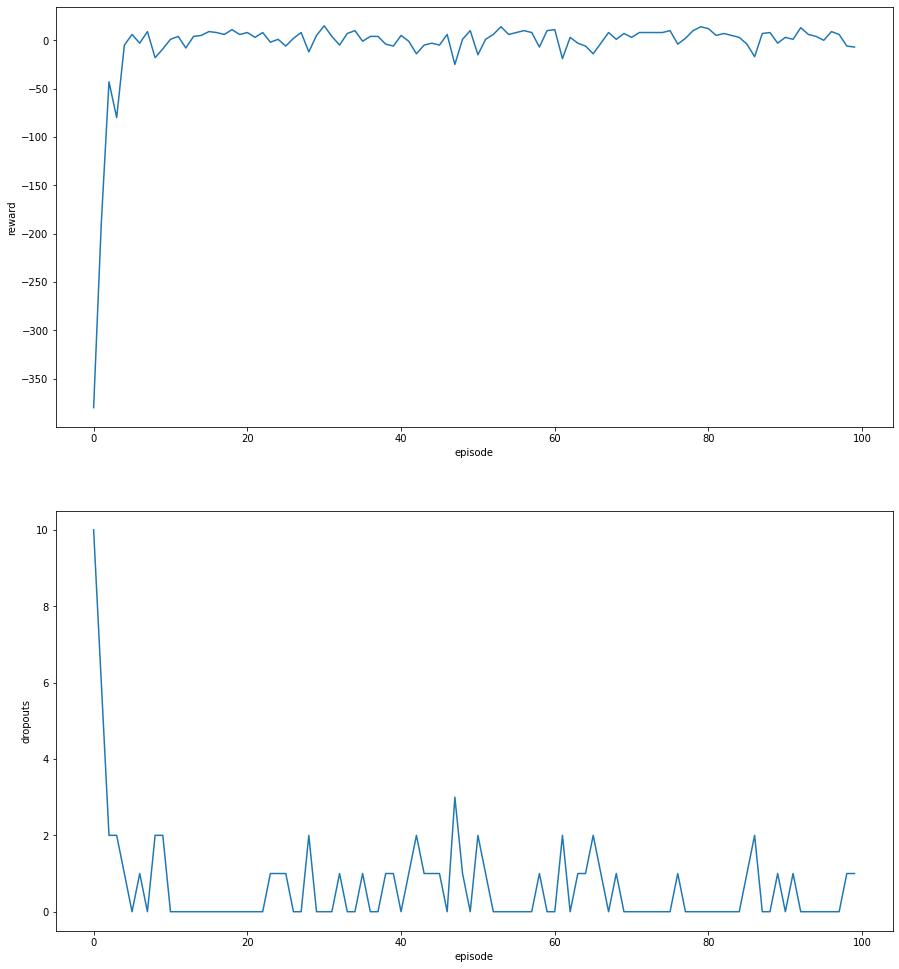

In [16]:
plt.figure(figsize=(15,17))
plt.subplot(2,1,1)
plt.plot(reward_list)
plt.xlabel('episode')
plt.ylabel('reward')

plt.subplot(2,1,2)
plt.plot(dropout_list)
plt.xlabel('episode')
plt.ylabel('dropouts')